In [1]:
!which python

/opt/anaconda3/envs/iris-explore/bin/python


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#standard imports
import os
#third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [4]:
sns.set()

## Load Data

In [5]:
data = datasets.load_iris()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [13]:
df['target']=data['target']

In [14]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
# map target number to target names based on data description
df['target_name']=df['target'].map({0:"Setosa",1:"Versicolour",2:"Virginica"})

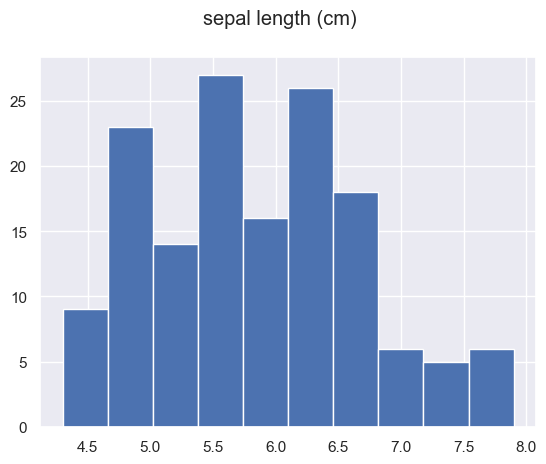

In [17]:
col='sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

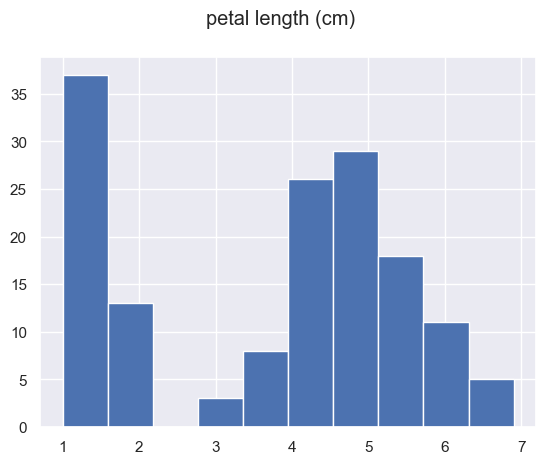

In [18]:
col='petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

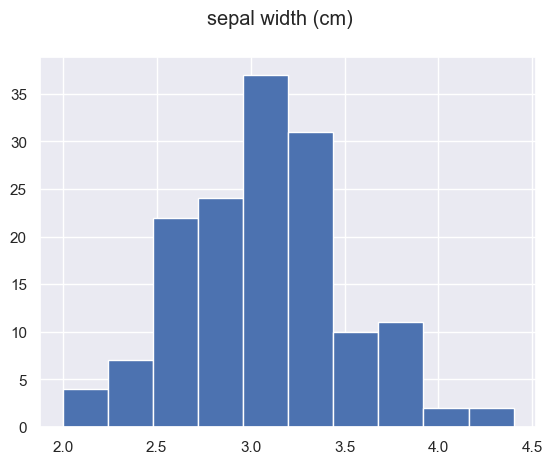

In [19]:
col='sepal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

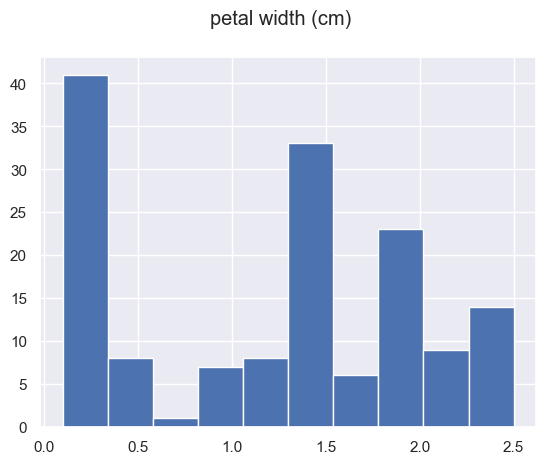

In [20]:
col='petal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

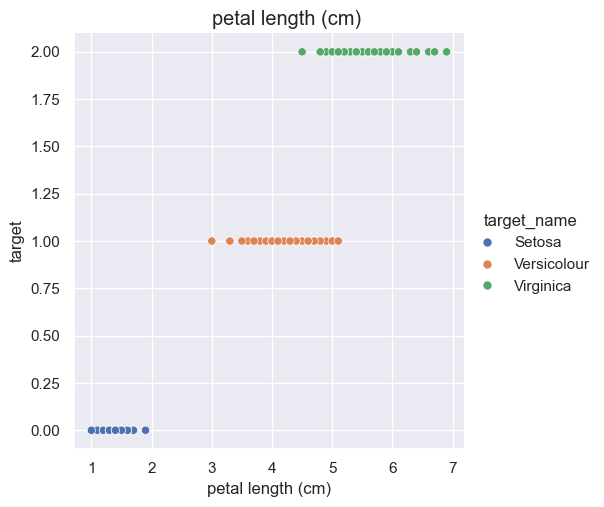

In [21]:
col='petal length (cm)'
sns.relplot(x=col,y='target',hue='target_name',data=df)
# ,palette="Dark2"
plt.suptitle(col,y=1.01)
plt.show()

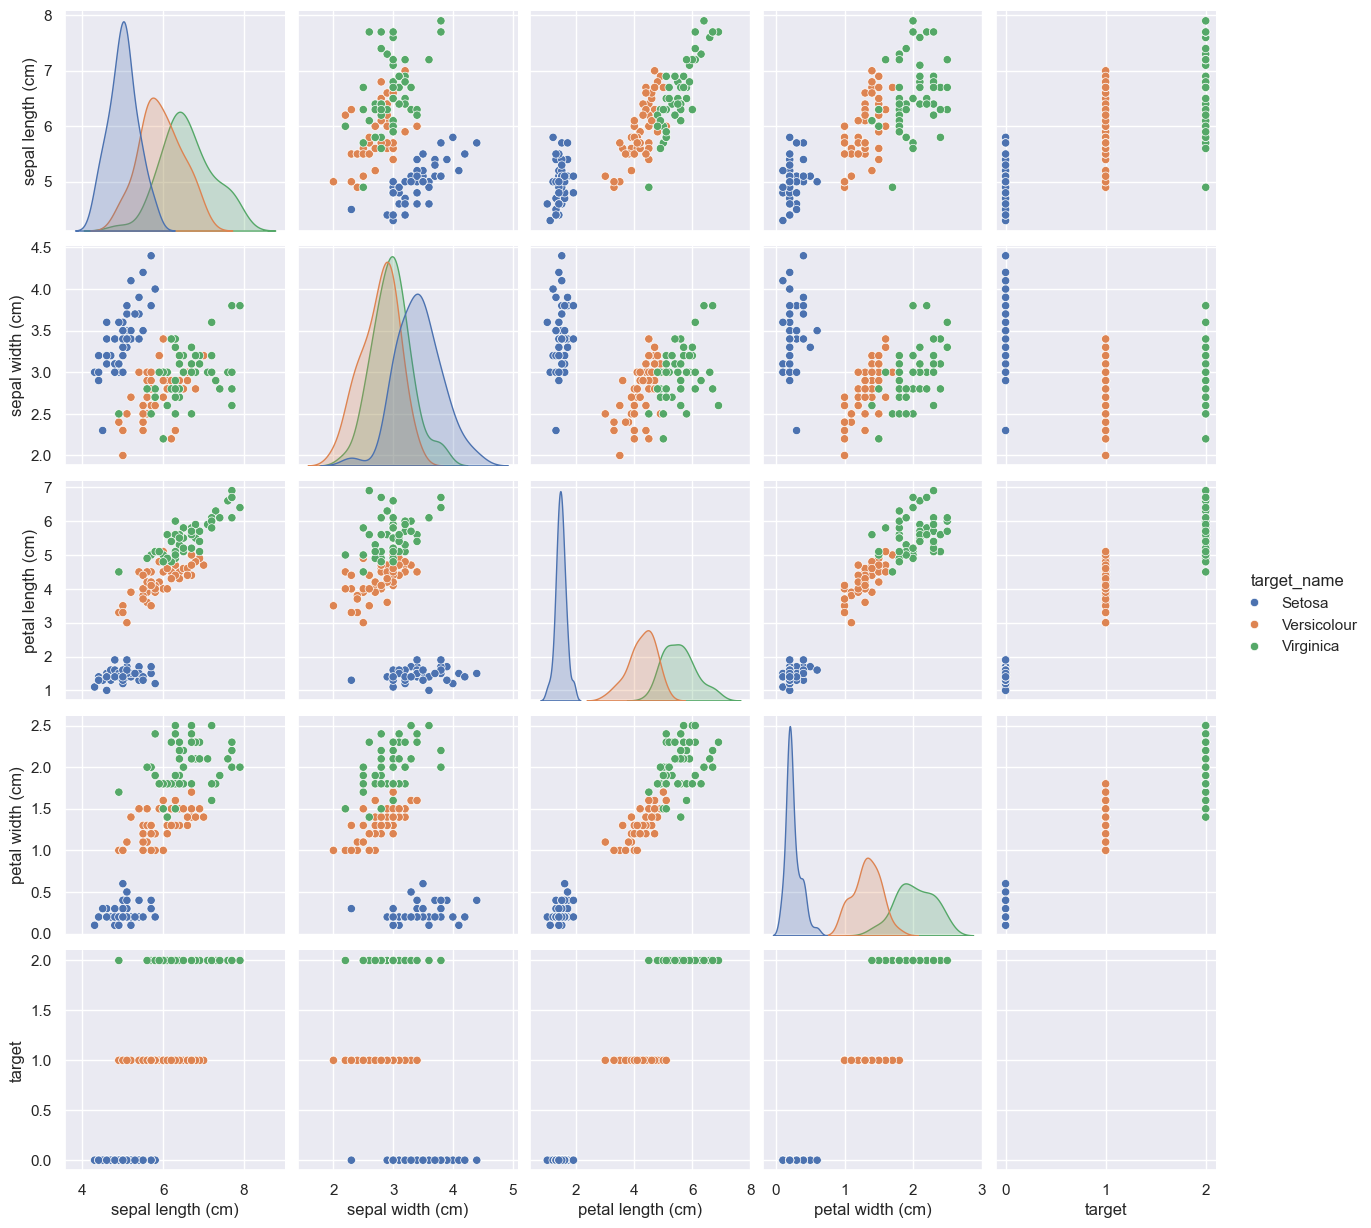

In [22]:
sns.pairplot(df,hue='target_name')
plt.show()

# Test-train split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [25]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

In [26]:
X_train, y_train = df_train.drop(columns=['target','target_name']), df_train['target']
X_test, y_test = df_test.drop(columns=['target','target_name']), df_test['target']

In [27]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [29]:
df_test.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

# Baseline setting via simple decision tree (Manual)

In [30]:
# Baseline 
df_baseline_pred = df.copy()

In [31]:
# df_baseline_pred['predictions']= if df['petal length (cm)']<=2.5 : 0 elif df['petal length (cm)']<=4.8 : 2 else 3

def simple_decision_tree(petal_length):
    if petal_length <= 2.5:
        return 0
    elif petal_length <= 4.8:
        return 1
    else :
        return 2


In [32]:
np.array(df_train['petal length (cm)'][:])

array([1. , 1.5, 4.4, 1.6, 1.3, 5. , 4.5, 1.5, 1.4, 1.5, 5.1, 4.5, 4.7,
       1.3, 1.5, 3.7, 5.1, 5.5, 4.4, 6.1, 4.2, 6.6, 4.5, 1.4, 6.7, 4.1,
       1.4, 1.3, 1.9, 3.5, 4.9, 1.9, 1.6, 1.7, 4.2, 1.5, 4.2, 6.7, 1.4,
       4.3, 5. , 1.4, 4.8, 5.1, 4. , 4.5, 5.4, 4. , 1.7, 3.3, 5.3, 1.4,
       1.2, 3.8, 5. , 1.5, 5.1, 1.5, 1.6, 4.8, 3. , 5.7, 5.1, 5.6, 6.1,
       4. , 1.4, 1.1, 5. , 6. , 1.5, 1.4, 1.3, 4.9, 5.6, 1.4, 5.5, 6. ,
       1.3, 4.7, 4.6, 4.8, 4.7, 5.3, 1.6, 5.4, 4.2, 5.2, 3.5, 3.9, 4.6,
       1.3, 4.6, 4.4, 1.5, 4.1, 6.3, 5.7, 1.5, 3.3, 5.7, 5.8, 1.4, 5.6,
       1.4, 4.9, 6.1, 5.6, 4.1, 5.5, 4.4, 4.3, 4.9, 5.1, 1.7, 4. , 4.5,
       1.2, 4. , 5.9])

In [33]:
manual_dt_preds=np.array([simple_decision_tree(val) for val in np.array(df['petal length (cm)'][:])])

In [34]:
# comparison: 
from sklearn.metrics import classification_report
report = classification_report(np.array(df['target']), manual_dt_preds, digits=3)

In [35]:
print(report)
print('Manual Decision Tree Accuracy: {:.2%}'.format(np.mean(df['target']== manual_dt_preds)))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.939     0.920     0.929        50
           2      0.922     0.940     0.931        50

    accuracy                          0.953       150
   macro avg      0.953     0.953     0.953       150
weighted avg      0.953     0.953     0.953       150

Manual Decision Tree Accuracy: 95.33%


# Machine Learning
### 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [38]:
LRmodel = LogisticRegression(random_state=42,max_iter=10000)

In [39]:
print(X_train.shape,y_train.shape)

(120, 4) (120,)


In [40]:
LRmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [41]:
y_pred=LRmodel.predict(X_test)
y_pred_prob = LRmodel.predict_proba(X_test)

In [42]:
print(classification_report(y_pred,y_test,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30



In [43]:
LRmodel.score(X_test,y_test)

1.0

In [44]:
print(np.array(y_pred))
print(np.array(y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### 2. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [47]:
RFmodel = RandomForestClassifier(random_state=111)
RFmodel.fit(X_train,y_train)

RandomForestClassifier(random_state=111)

In [48]:
y_pred=RFmodel.predict(X_test)
y_pred_prob = RFmodel.predict_proba(X_test)

In [49]:
print(classification_report(y_pred,y_test,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30



In [50]:
RFmodel.score(X_test,y_test)

1.0

### 3. RandomsearchCV for parameter tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform
import random

In [52]:
LRmodel = LogisticRegression(random_state=42,max_iter=1000)

In [53]:
LRmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [54]:
LRmodel.score(X_test,y_test)

1.0

In [55]:
param_dist = {
    'C': loguniform(0.001, 100)  # Number of trees
    # 'intercept_scaling' : loguniform(0.001, 100)
    # 'penalty' : ['l2'],
    # 'solver' : ['lbfgs', 'liblinear', 'newton-cholesky', 'saga']
    # 'min_samples_split': randint(2, 10),  # Min samples required to split a node
    # 'min_samples_leaf': randint(1, 5)  # Min samples required in a leaf node
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=LRmodel, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Best parameters & model
print("Best Hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate model
y_pred = best_model.predict(X_test)
print("Accuracy:", best_model.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': np.float64(0.9846738873614566)}
Accuracy: 1.0


In [56]:
# from scipy.stats import loguniform
# loguniform(0.001, 100)

### 3. Cross validation methods

In [57]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [58]:
LRmodel_crossval = LogisticRegression()

In [59]:
accuracies=cross_val_score(LRmodel_crossval,X_train,y_train,cv=5,scoring="accuracy")

In [60]:
print('Cross validation average accuracy for 5-folds: {}'.format(np.mean(accuracies)))

Cross validation average accuracy for 5-folds: 0.9666666666666666


In [61]:
cv_pred=cross_val_predict(LRmodel_crossval,X_train,y_train,cv=5)

In [62]:
correct_preds=np.array(cv_pred==y_train)

In [63]:
incorrect_preds=~correct_preds

In [66]:
incorrect_preds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [68]:
X_train[incorrect_preds]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
77,6.7,3.0,5.0,1.7
70,5.9,3.2,4.8,1.8
83,6.0,2.7,5.1,1.6
106,4.9,2.5,4.5,1.7


In [69]:
df_predictions = df_train.copy()

In [70]:
df_predictions['correct_predictions'] = correct_preds

In [71]:
df_predictions['prediction']=cv_pred

In [72]:
df_predictions['prediction_label']=df_predictions['prediction'].map({0:"Setosa",1:"Versicolour",2:"Virginica"})

In [73]:
df_predictions.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,prediction,prediction_label
22,4.6,3.6,1.0,0.2,0,Setosa,True,0,Setosa
15,5.7,4.4,1.5,0.4,0,Setosa,True,0,Setosa
65,6.7,3.1,4.4,1.4,1,Versicolour,True,1,Versicolour
11,4.8,3.4,1.6,0.2,0,Setosa,True,0,Setosa
42,4.4,3.2,1.3,0.2,0,Setosa,True,0,Setosa


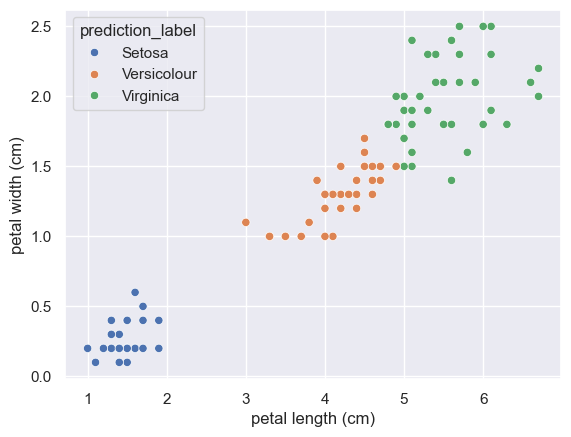

In [74]:
sns.scatterplot(df_predictions,x='petal length (cm)',y='petal width (cm)',hue='prediction_label')
plt.show()

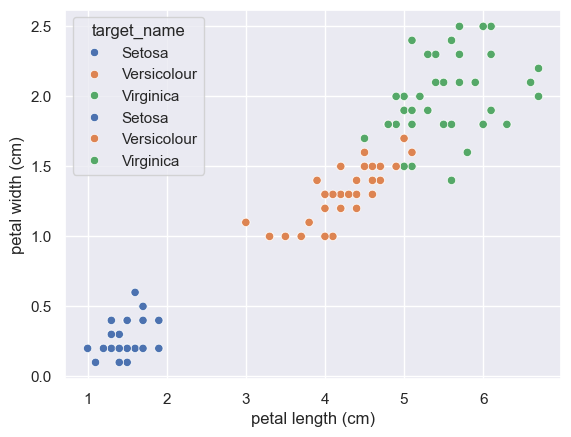

In [76]:
sns.scatterplot(df_predictions,x='petal length (cm)',y='petal width (cm)',hue='target_name')
plt.show()